In [1]:
import os
import shutil
import pandas as pd

# Paths
csv_path = r"D:\CIP\DTI_CSV.csv"  # Update with your CSV file path
dti_root = r"D:\CIP\DTI"  # Update with the root directory of DTI images
output_root = r"D:\CIP"  # Where sorted images will be stored

# Load the CSV
df = pd.read_csv(csv_path)

# Normalize MCI categories
df["Diagnosis"] = df["Diagnosis"].replace({"EMCI": "MCI", "LMCI": "MCI"})

# Create output directories for CN, MCI, AD
for category in ["CN", "MCI", "AD"]:
    os.makedirs(os.path.join(output_root, category), exist_ok=True)

# Move files based on Subject_ID
for _, row in df.iterrows():
    subject_id = row["Subject_ID"]
    diagnosis = row["Diagnosis"]

    subject_folder = os.path.join(dti_root, subject_id)
    
    if os.path.exists(subject_folder):
        # Destination folder
        dest_folder = os.path.join(output_root, diagnosis, subject_id)
        os.makedirs(dest_folder, exist_ok=True)

        # Move all files
        for root, _, files in os.walk(subject_folder):
            for file in files:
                if file.endswith(".dcm"):  # Ensure only DICOM files are moved
                    src_file = os.path.join(root, file)
                    shutil.move(src_file, dest_folder)

print("DTI images sorted into CN, MCI, and AD folders!")

DTI images sorted into CN, MCI, and AD folders!


In [7]:
import os

# Set the root directory where CN, MCI, and AD folders are stored
root_dir = "D:\\CIP"

# Iterate through each category and count files
for category in ["CN", "MCI", "AD"]:
    folder_path = os.path.join(root_dir, category)
    if os.path.exists(folder_path):
        file_count = sum(len(files) for _, _, files in os.walk(folder_path))
        print(f"{category}: {file_count} files")
    else:
        print(f"{category} folder not found!")

CN: 19020 files
MCI: 34802 files
AD: 8553 files


In [15]:
import os

cn_folder = "D:/CIP/CN"
mci_folder = "D:/CIP/MCI"
ad_folder = "D:/CIP/AD"

print("CN files:", len(os.listdir(cn_folder)))
print("MCI files:", len(os.listdir(mci_folder)))
print("AD files:", len(os.listdir(ad_folder)))


CN files: 69
MCI files: 131
AD files: 49


In [17]:
import os
folder_path = "D:/CIP/CN"
print(os.listdir(folder_path))

['003_S_4081', '003_S_4119', '003_S_4288', '003_S_4350', '003_S_4441', '003_S_4555', '003_S_4644', '003_S_4839', '003_S_4840', '003_S_4872', '003_S_4900', '007_S_4387', '007_S_4488', '007_S_4516', '007_S_4620', '007_S_4637', '007_S_5265', '016_S_4097', '016_S_4121', '016_S_4638', '016_S_4688', '016_S_4951', '016_S_4952', '021_S_4254', '021_S_4276', '021_S_4335', '021_S_4421', '027_S_5083', '027_S_5093', '027_S_5169', '027_S_5170', '029_S_4279', '029_S_4290', '029_S_4384', '029_S_4385', '029_S_4585', '029_S_4652', '029_S_5219', '057_S_0934', '057_S_5292', '094_S_4234', '094_S_4459', '094_S_4460', '094_S_4503', '094_S_4560', '094_S_4649', '098_S_0896', '098_S_4002', '098_S_4003', '098_S_4018', '098_S_4050', '098_S_4275', '098_S_4506', '099_S_4076', '099_S_4086', '099_S_4104', '109_S_4499', '126_S_5243', '127_S_4148', '127_S_4198', '127_S_4604', '127_S_4645', '127_S_4843', '129_S_0778', '129_S_4369', '129_S_4371', '129_S_4396', '129_S_4422', '131_S_0123']


In [19]:
import os
import shutil

folder_path = "D:/CIP/CN"
output_path = "D:/CIP/output"

os.makedirs(output_path, exist_ok=True)

for root, _, files in os.walk(folder_path):  # Walk through all subdirectories
    for file in files:
        src = os.path.join(root, file)
        dst = os.path.join(output_path, file)

        if file.startswith('.') or not os.access(src, os.R_OK):
            print(f"Skipping {file} (No permission)")
            continue

        try:
            shutil.copy(src, dst)
        except PermissionError:
            print(f"Skipping {file} (Permission Denied)")
        except Exception as e:
            print(f"Error copying {file}: {e}")

print("Copying complete!")


Copying complete!


In [21]:
import os
print(len(os.listdir("D:/CIP/output")))


19020


In [23]:
import os

folder_path = "D:/CIP/CN"

for subject in os.listdir(folder_path):
    subject_path = os.path.join(folder_path, subject)
    
    # Check if it's a directory (not a file)
    if os.path.isdir(subject_path):
        image_files = os.listdir(subject_path)

        if len(image_files) == 0:
            print(f"⚠️ No images found inside: {subject_path}")
        else:
            print(f"✅ {len(image_files)} images found in {subject_path}")


✅ 107 images found in D:/CIP/CN\003_S_4081
✅ 236 images found in D:/CIP/CN\003_S_4119
✅ 295 images found in D:/CIP/CN\003_S_4288
✅ 295 images found in D:/CIP/CN\003_S_4350
✅ 295 images found in D:/CIP/CN\003_S_4441
✅ 236 images found in D:/CIP/CN\003_S_4555
✅ 177 images found in D:/CIP/CN\003_S_4644
✅ 59 images found in D:/CIP/CN\003_S_4839
✅ 59 images found in D:/CIP/CN\003_S_4840
✅ 236 images found in D:/CIP/CN\003_S_4872
✅ 236 images found in D:/CIP/CN\003_S_4900
✅ 350 images found in D:/CIP/CN\007_S_4387
✅ 236 images found in D:/CIP/CN\007_S_4488
✅ 352 images found in D:/CIP/CN\007_S_4516
✅ 350 images found in D:/CIP/CN\007_S_4620
✅ 333 images found in D:/CIP/CN\007_S_4637
✅ 118 images found in D:/CIP/CN\007_S_5265
✅ 179 images found in D:/CIP/CN\016_S_4097
✅ 359 images found in D:/CIP/CN\016_S_4121
✅ 180 images found in D:/CIP/CN\016_S_4638
✅ 179 images found in D:/CIP/CN\016_S_4688
✅ 296 images found in D:/CIP/CN\016_S_4951
✅ 298 images found in D:/CIP/CN\016_S_4952
✅ 455 images 

In [25]:
!pip install pydicom

In [98]:
#data preprocessing
import os
import numpy as np
import cv2
import pydicom
from tqdm import tqdm

# Set paths
input_dir = "D:/CIP"
output_dir = "D:/CIP/preprocessed_dti_images"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

def preprocess_dti(image):
    """Preprocess DTI image by normalizing and converting to uint8."""
    eps = 1e-8  # Small value to prevent division by zero
    image = image.astype(np.float32)

    # Normalize image
    img_min, img_max = image.min(), image.max()
    if img_max > img_min:  # Avoid division by zero
        image = (image - img_min) / (img_max - img_min + eps)
    else:
        image = np.zeros_like(image)  # If all values are the same, make it blank

    # Convert NaNs to 0
    image = np.nan_to_num(image)

    return image

def process_patient_images(patient_path, output_path):
    """Process all DTI images for a single patient."""
    os.makedirs(output_path, exist_ok=True)

    for filename in os.listdir(patient_path):
        if filename.endswith(".dcm"):
            file_path = os.path.join(patient_path, filename)

            try:
                dicom_data = pydicom.dcmread(file_path)
                img_array = dicom_data.pixel_array

                # Preprocess image
                processed_img = preprocess_dti(img_array)

                # Save as PNG
                output_file = os.path.join(output_path, filename.replace(".dcm", ".png"))
                cv2.imwrite(output_file, (processed_img * 255).astype(np.uint8))

            except Exception as e:
                print(f"Skipping {file_path} (Failed to load): {e}")

# Iterate through class folders (CN, MCI, AD)
for class_label in ["CN", "MCI", "AD"]:
    class_path = os.path.join(input_dir, class_label)
    output_class_path = os.path.join(output_dir, class_label)

    os.makedirs(output_class_path, exist_ok=True)

    patient_folders = sorted(os.listdir(class_path))
    print(f"Processing {class_label}: ")

    for patient_folder in tqdm(patient_folders):
        patient_path = os.path.join(class_path, patient_folder)
        output_patient_path = os.path.join(output_class_path, patient_folder)

        process_patient_images(patient_path, output_patient_path)

print("✅ Preprocessing Complete!")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/CIP\\CN'

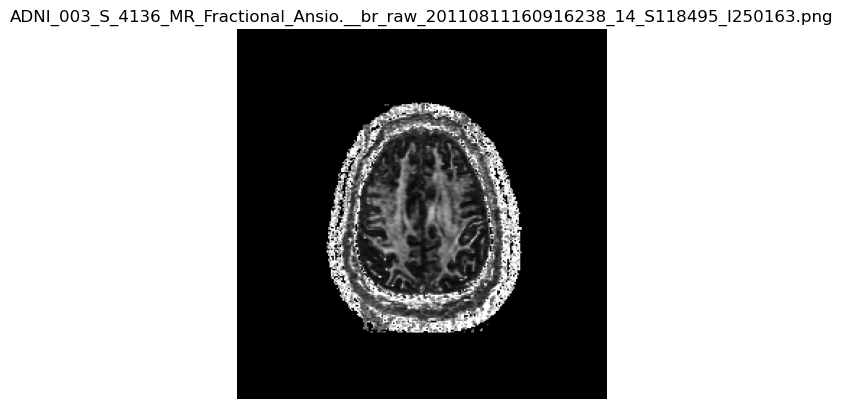

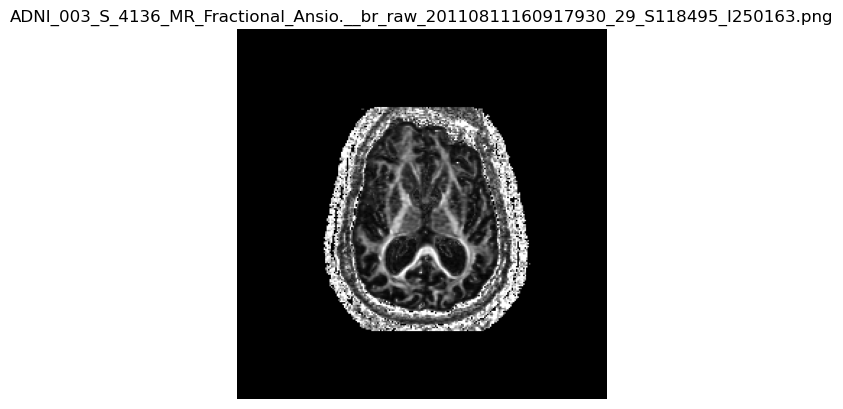

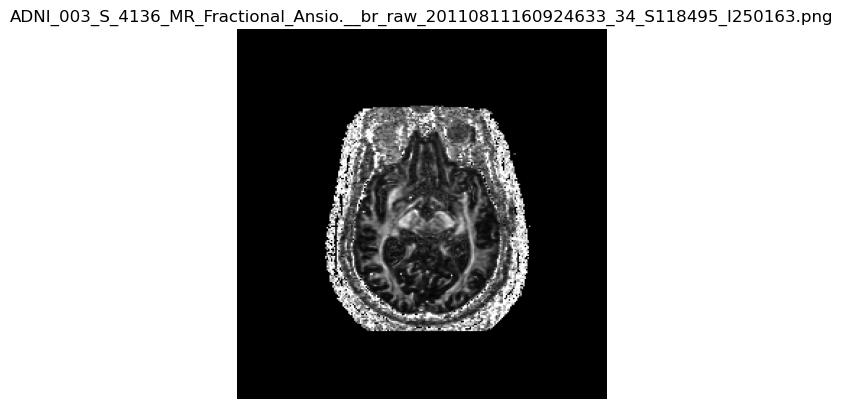

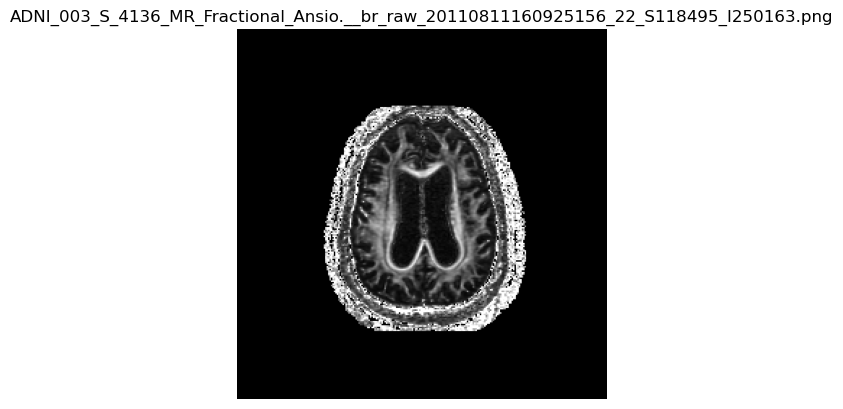

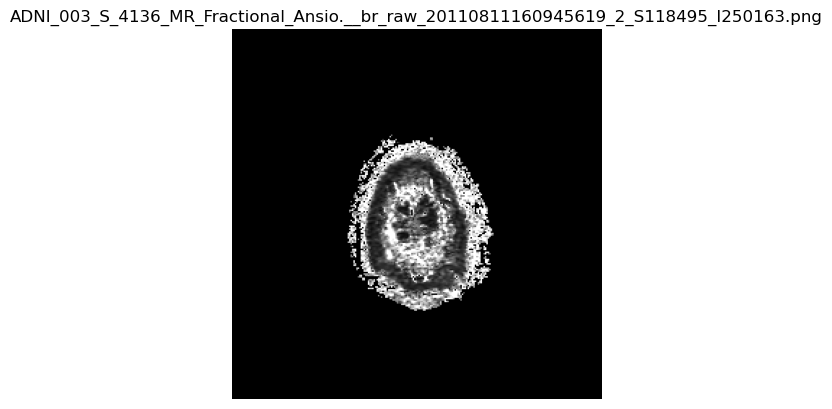

In [31]:
#displaying preprocessed image
import cv2
import matplotlib.pyplot as plt
import os

folder_path = "D:/CIP/preprocessed_dti_images"  # Update with your path

# Get image files from subdirectories
image_files = []
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):  # Filter valid image files
            image_files.append(os.path.join(root, file))

# Select a few images to display
sample_images = image_files[:5]  

for img_path in sample_images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    
    if img is None:
        print(f"⚠️ Error loading image: {img_path}")
        continue  # Skip bad images
    
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(os.path.basename(img_path))
    plt.axis('off')

plt.show()


In [33]:
!pip install imgaug


   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/948.0 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00


In [40]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------------
# CONFIGURATION
# -------------------------
input_dir = "D:/CIP/preprocessed_dti_images"          # Original preprocessed images folder
output_dir = "D:/CIP/augmented_dti_images_balanced"     # Where balanced images will be stored
target_count = 34802                                    # Set target to MCI's count (or another desired number)

# Augmentation settings (feel free to adjust)
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# -------------------------
# UTILITY FUNCTIONS
# -------------------------
def get_all_image_paths(folder):
    """Recursively find all image paths (png, jpg, jpeg) under folder."""
    image_paths = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

def copy_originals(class_in_path, class_out_path):
    """Copy all original images from class_in_path (recursively) to class_out_path."""
    os.makedirs(class_out_path, exist_ok=True)
    image_paths = get_all_image_paths(class_in_path)
    for img_path in image_paths:
        filename = os.path.basename(img_path)
        out_path = os.path.join(class_out_path, filename)
        if not os.path.exists(out_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                cv2.imwrite(out_path, img)
    return get_all_image_paths(class_out_path)  # return list of copied image paths

# -------------------------
# MAIN PROCESS: For Each Class (CN, MCI, AD)
# -------------------------
classes = ["CN", "MCI", "AD"]

for cls in classes:
    print(f"\nProcessing class: {cls}")
    
    # Define folder paths for this class
    class_input_path = os.path.join(input_dir, cls)
    class_output_path = os.path.join(output_dir, cls)
    os.makedirs(class_output_path, exist_ok=True)
    
    # Copy originals to output folder
    original_images = copy_originals(class_input_path, class_output_path)
    original_count = len(original_images)
    print(f"  Original images copied for {cls}: {original_count}")
    
    # Determine how many augmented images we need
    current_count = len(get_all_image_paths(class_output_path))
    required = target_count - current_count
    print(f"  {cls}: {current_count} images in output, need {required} augmented images.")
    
    if required <= 0:
        print(f"  No augmentation needed for {cls}.")
        continue

    generated = 0
    # For each original image, generate augmented versions until we meet the requirement
    for img_path in original_images:
        if generated >= required:
            break
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"  ❌ Skipping {img_path} (cannot read)")
            continue

        # Prepare image for augmentation: add channel & batch dimensions
        img_array = np.expand_dims(img, axis=-1)  # shape: (H, W, 1)
        img_array = np.expand_dims(img_array, axis=0)  # shape: (1, H, W, 1)
        
        # Generate augmented images from this image
        aug_iter = datagen.flow(img_array, batch_size=1, shuffle=False)
        while generated < required:
            aug_img = next(aug_iter)[0]
            aug_img_uint8 = (np.clip(aug_img, 0, 1) * 255).astype(np.uint8).squeeze()
            new_filename = f"aug_{generated}_" + os.path.basename(img_path).split('.')[0] + ".png"
            save_path = os.path.join(class_output_path, new_filename)
            cv2.imwrite(save_path, aug_img_uint8)
            generated += 1
            if generated % 10 == 0:
                print(f"  {cls}: Generated {generated}/{required} augmented images...")
            # Optionally, limit number per original image
            # break after generating, e.g., 3 images per original if needed

    total_after = len(get_all_image_paths(class_output_path))
    print(f"  {cls}: Augmentation complete. Total images now: {total_after}")

print("\n🎉 Data augmentation and balancing complete!")



Processing class: CN
  Original images copied for CN: 19020
  CN: 19020 images in output, need 15782 augmented images.
  CN: Generated 10/15782 augmented images...
  CN: Generated 20/15782 augmented images...
  CN: Generated 30/15782 augmented images...
  CN: Generated 40/15782 augmented images...
  CN: Generated 50/15782 augmented images...
  CN: Generated 60/15782 augmented images...
  CN: Generated 70/15782 augmented images...
  CN: Generated 80/15782 augmented images...
  CN: Generated 90/15782 augmented images...
  CN: Generated 100/15782 augmented images...
  CN: Generated 110/15782 augmented images...
  CN: Generated 120/15782 augmented images...
  CN: Generated 130/15782 augmented images...
  CN: Generated 140/15782 augmented images...
  CN: Generated 150/15782 augmented images...
  CN: Generated 160/15782 augmented images...
  CN: Generated 170/15782 augmented images...
  CN: Generated 180/15782 augmented images...
  CN: Generated 190/15782 augmented images...
  CN: Generated

In [44]:
import os

dataset_path = "D:/CIP/augmented_dti_images_balanced"  # Update if needed

for category in ["CN", "MCI", "AD"]:
    class_path = os.path.join(dataset_path, category)
    count = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
    print(f"{category}: {count} images")


CN: 34802 images
MCI: 34802 images
AD: 34802 images


In [46]:
import os
import shutil
import random

# Set paths
input_dir = "D:/CIP/augmented_dti_images_balanced"  # Update with your actual dataset path
output_dir = "D:/CIP/split_dti_images"

# Train/Val/Test split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Categories
categories = ["CN", "MCI", "AD"]

# Create output directories
for split in ["train", "val", "test"]:
    for category in categories:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Function to split dataset
def split_data():
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)
        random.shuffle(images)

        # Split
        train_count = int(len(images) * train_ratio)
        val_count = int(len(images) * val_ratio)

        train_images = images[:train_count]
        val_images = images[train_count:train_count + val_count]
        test_images = images[train_count + val_count:]

        # Move images
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(output_dir, "train", category, img))

        for img in val_images:
            shutil.move(os.path.join(category_path, img), os.path.join(output_dir, "val", category, img))
 
        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(output_dir, "test", category, img))

        print(f"✅ {category}: Train={len(train_images)}, Val={len(val_images)}, Test={len(test_images)}")

# Run the split
split_data()
print("🎯 Dataset successfully split into Train/Val/Test sets!")


✅ CN: Train=27841, Val=3480, Test=3481
✅ MCI: Train=27841, Val=3480, Test=3481
✅ AD: Train=27841, Val=3480, Test=3481
🎯 Dataset successfully split into Train/Val/Test sets!


Found 83523 images belonging to 3 classes.
Found 10440 images belonging to 3 classes.
Found 10443 images belonging to 3 classes.


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 3058s 1s/step - accuracy: 0.6825 - loss: 0.9766 - val_accuracy: 0.7398 - val_loss: 0.5683
Epoch 2/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2937s 1s/step - accuracy: 0.7253 - loss: 0.5984 - val_accuracy: 0.7387 - val_loss: 0.6144
Epoch 3/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2893s 1s/step - accuracy: 0.7355 - loss: 0.5843 - val_accuracy: 0.5534 - val_loss: 0.8439
Epoch 4/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2682s 1s/step - accuracy: 0.7314 - loss: 0.5955 - val_accuracy: 0.7273 - val_loss: 0.7124
Epoch 5/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2443s 936ms/step - accuracy: 0.7322 - loss: 0.5872 - val_accuracy: 0.7401 - val_loss: 0.5678
Epoch 6/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2521s 965ms/step - accuracy: 0.7343 - loss: 0.5786 - val_accuracy: 0.7400 - val_loss: 0.5674
Epoch 7/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2572s 985ms/step - accuracy: 0.7326 - loss: 0.5822 - val_accuracy: 0.7385 - val_loss: 0.5880
Epoch 8/15
2611/2611 ━━━━━━━━━━━━━━━━━━━━ 2496s 956ms/step - accura

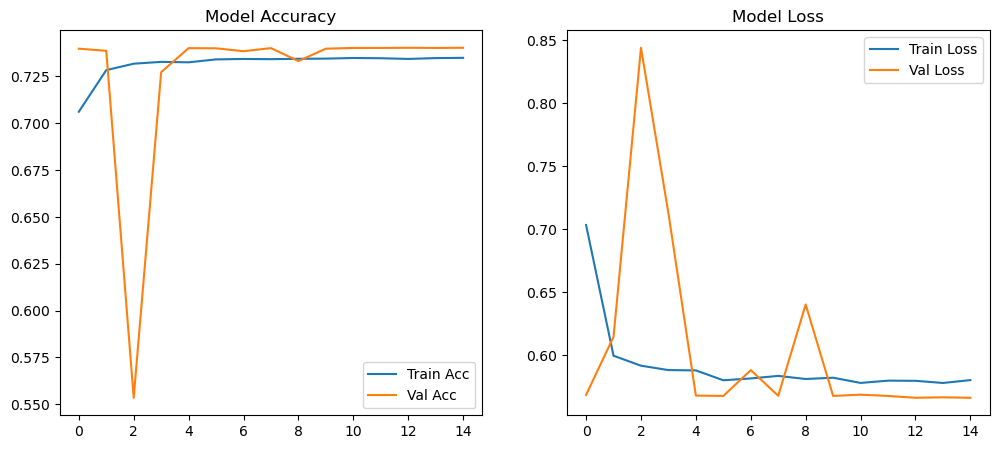

327/327 ━━━━━━━━━━━━━━━━━━━━ 131s 400ms/step - accuracy: 0.5544 - loss: 0.7955
Test Accuracy: 0.7350


In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

# Define dataset paths
train_dir = "D:/CIP/split_dti_images/train"
val_dir = "D:/CIP/split_dti_images/val"
test_dir = "D:/CIP/split_dti_images/test"

# Image parameters
IMG_SIZE = (128, 128)  # Resize all images to this size
BATCH_SIZE = 32  # Number of images per training step

# Load and augment dataset (for grayscale images)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation/testing

# Load images (ensure grayscale=True)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', color_mode='grayscale'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', color_mode='grayscale'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', color_mode='grayscale', shuffle=False
)

# Build a CNN for grayscale images
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 1)),  # 1 channel for grayscale
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")  # 3 classes: CN, MCI, AD
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train model
EPOCHS = 15
history = model.fit(
    train_generator, validation_data=val_generator, epochs=EPOCHS
)

# Save model
model.save("alzheimer_dti_cnn.h5")

# Plot accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Model Loss")
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


In [56]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128), color_mode="grayscale")  # Ensure correct size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize (if your model expects this)
    return img

image_path = r"D:\CIP\split_dti_images\test\AD\ADNI_003_S_4136_MR_Fractional_Ansio.__br_raw_20110811161049661_30_S118495_I250163.PNG"  # Ensure this is the correct path
input_image = preprocess_image(image_path)

# Check the shape before prediction
print("Preprocessed image shape:", input_image.shape)  # Should be (1, 128, 128, 1)

# Predict
predictions = model.predict(input_image)


Preprocessed image shape: (1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


In [58]:
print("Raw model output:", predictions)  
predicted_class = np.argmax(predictions, axis=1)[0]  
print("Predicted class:", predicted_class)  


Raw model output: [[0.13849631 0.30309063 0.558413  ]]
Predicted class: 2


In [60]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,550,475 (74.58 MB)

 Trainable params: 6,516,675 (24.86 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 13,033,352 (49.72 MB)

In [72]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("alzheimer_dti_cnn.h5")

# Define class labels (assuming you have CN, MCI, AD)
class_labels = ["CN", "MCI", "AD"]


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "D:/CIP/split_dti_images/train"

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', color_mode='grayscale'
)

print(train_generator.class_indices)


Found 83523 images belonging to 3 classes.
{'AD': 0, 'CN': 1, 'MCI': 2}


In [76]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("alzheimer_dti_cnn.h5")

# Recompile the model (optional but helps avoid warnings)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Define class labels
class_labels = [ "AD","CN","MCI"]

# Path to the test image
image_path = r"D:\CIP\split_dti_images\test\MCI\ADNI_003_S_0908_MR_Fractional_Ansio.__br_raw_20140113094208676_11_S210033_I404525.png"

# Load and preprocess the image
IMG_SIZE = (128, 128)  # Match training size
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
image = cv2.resize(image, IMG_SIZE)  # Resize
image = image / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = np.expand_dims(image, axis=-1)  # Add channel dimension

# Make a prediction
prediction = model.predict(image)

# Get the class with highest probability
predicted_class = np.argmax(prediction)

# Print the result
print(f"Predicted Class: {class_labels[predicted_class]}")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(224, 224, 1)),  # Explicitly define input shape
    Conv2D(32, (3,3), activation='relu'),  
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: CN, MCI, AD
])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training and validation (grayscale conversion)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation

# Training Data
train_generator = train_datagen.flow_from_directory(
    'D:/CIP/split_dti_images/train',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Validation Data
val_generator = val_datagen.flow_from_directory(
    'D:/CIP/split_dti_images/val',  # Path to validation folder
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model with Validation
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator  # Include validation data
)

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

# Save Model
model.save("D:/CIP/alzheimer_dti_finetuned.h5")


In [11]:
# Save Model
model.save("D:/CIP/DTI_Model.h5")


In [15]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("D:/CIP/DTI_Model.h5")


In [19]:
import os
import numpy as np

test_images_dir = "D:\\CIP\\split_dti_images\\test\\CN"  # Update this if needed

# Ensure the directory exists
if not os.path.exists(test_images_dir):
    print("Error: Test image directory not found.")
else:
    # List all files (ensure it's only image files)
    all_files = os.listdir(test_images_dir)
    test_images = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Check if there are any images before selecting
    if not test_images:
        print("Error: No image files found in the test directory.")
    else:
        img_name = np.random.choice(test_images)
        img_path = os.path.join(test_images_dir, img_name)
        print("Selected Image:", img_path)


Selected Image: D:\CIP\split_dti_images\test\CN\aug_5293_ADNI_003_S_4081_MR_Fractional_Ansio.png


In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define image path
img_path = r"D:\CIP\split_dti_images\test\CN\aug_16_ADNI_003_S_4081_MR_Fractional_Ansio.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size if needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Print shape to verify
print("Image shape:", img_array.shape)


Image shape: (1, 224, 224, 3)


In [55]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r"D:\CIP\DTI_Model.h5")
print("Model loaded successfully!")


Model loaded successfully!


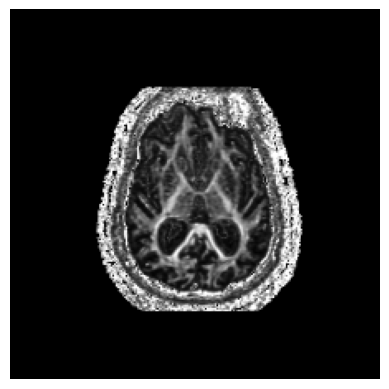

In [63]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to your test image
image_path = r"D:\CIP\split_dti_images\test\AD\ADNI_003_S_4136_MR_Fractional_Ansio.__br_raw_20110811161049661_30_S118495_I250163.png"# Update with your actual test image path

# Load and preprocess the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale since model was trained on grayscale
img = cv2.resize(img, (224, 224))  # Resize to match model input
img = img / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = np.expand_dims(img, axis=-1)  # Add channel dimension (224, 224, 1)

# Display the image
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")
plt.show()


In [65]:
# Predict using the model
predictions = model.predict(img)

# Get the predicted class index
predicted_class = np.argmax(predictions, axis=1)

# Define class labels (modify if needed)
class_labels = {0: "AD", 1: "CN", 2: "MCI"}  # Update according to your dataset
predicted_label = class_labels[predicted_class[0]]

print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
Predicted Class: AD


In [67]:
print(train_generator.class_indices)


{'AD': 0, 'CN': 1, 'MCI': 2}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


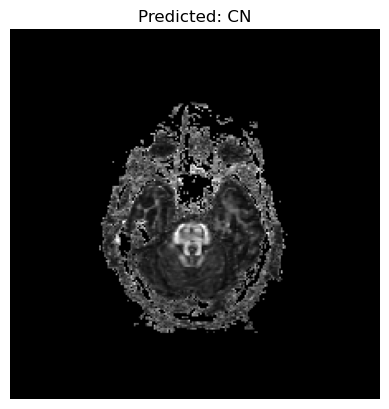

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


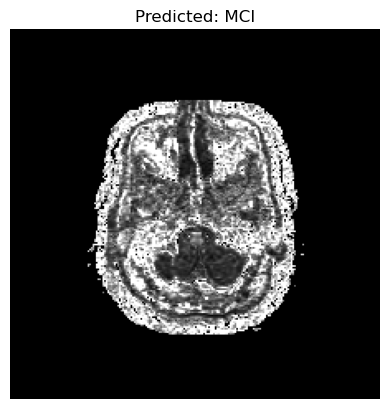

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


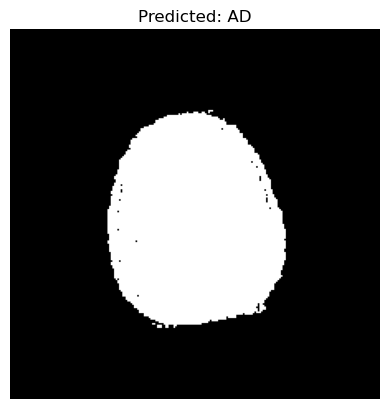

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


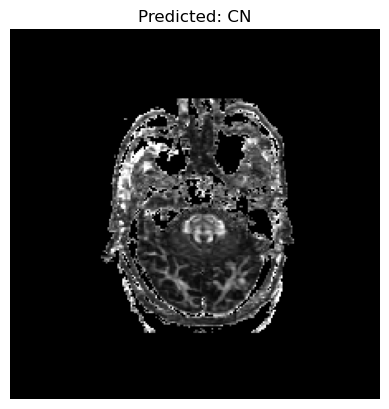

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


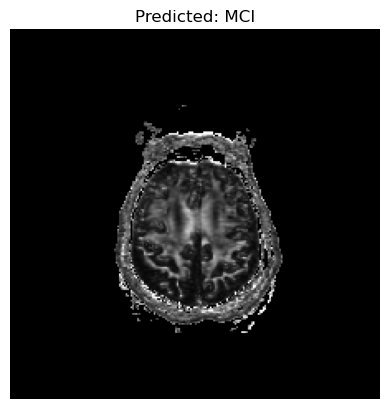

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


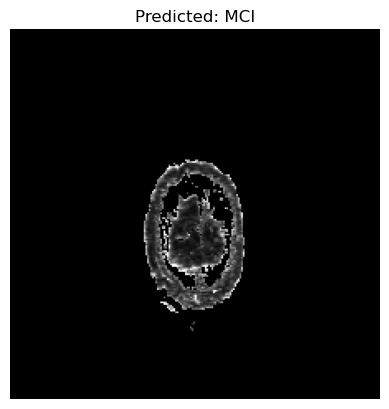

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


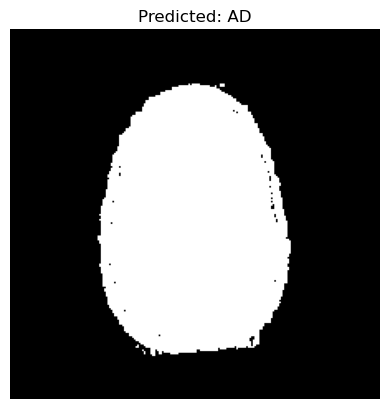

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


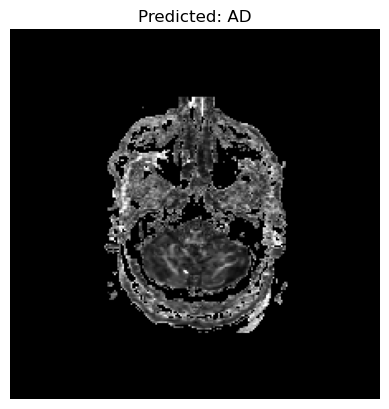

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


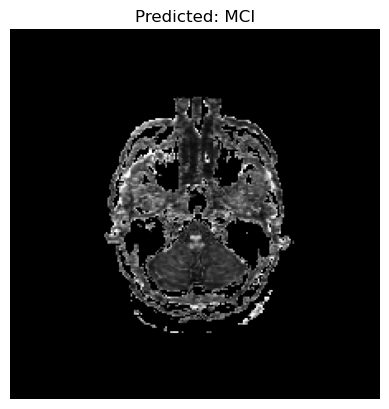

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


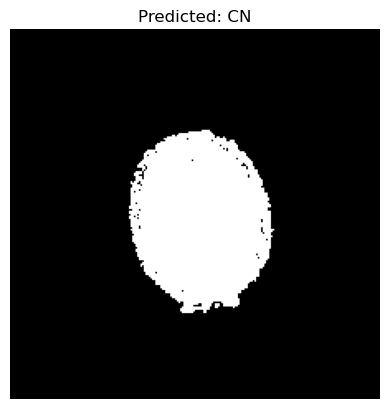

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


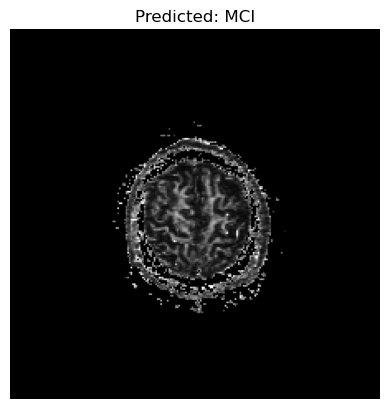

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


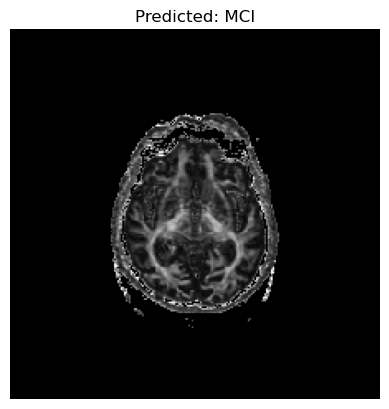

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


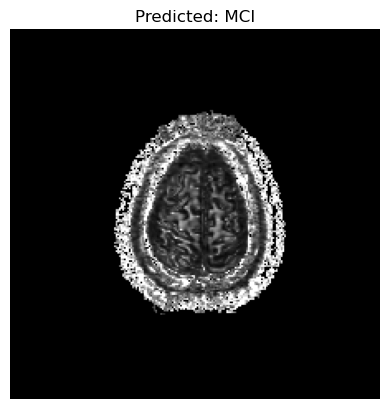

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


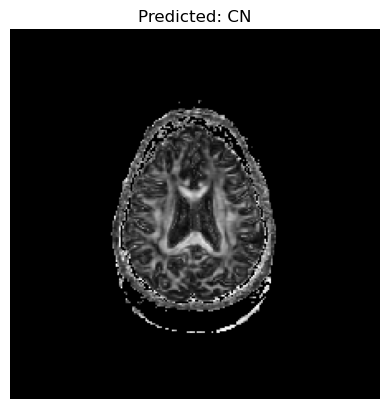

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


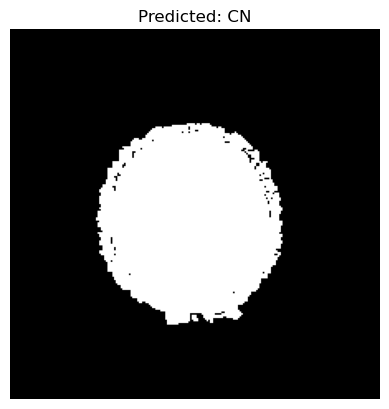

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


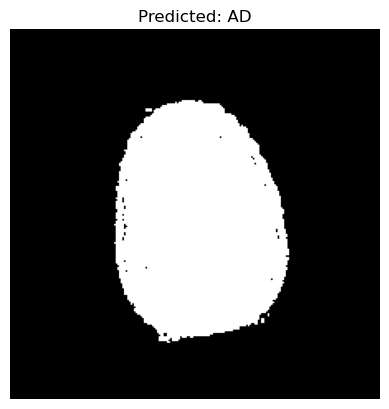

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


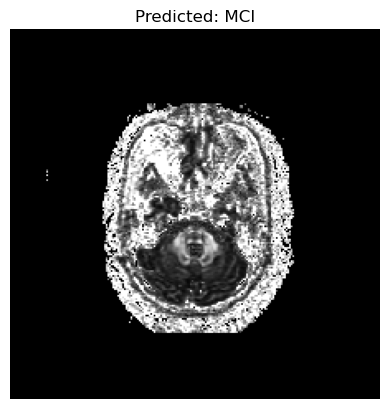

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


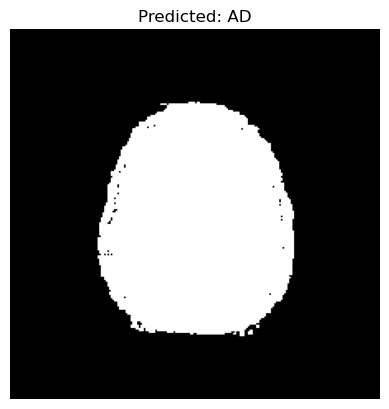

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


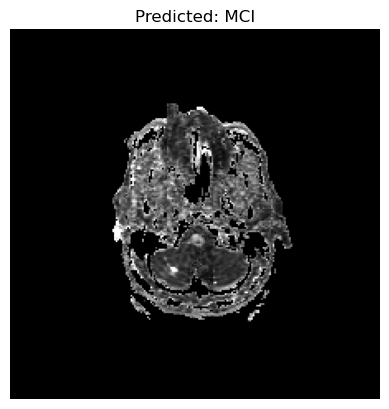

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


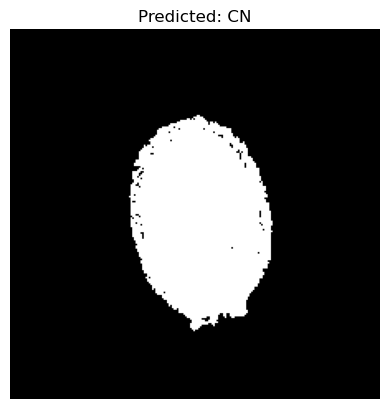

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


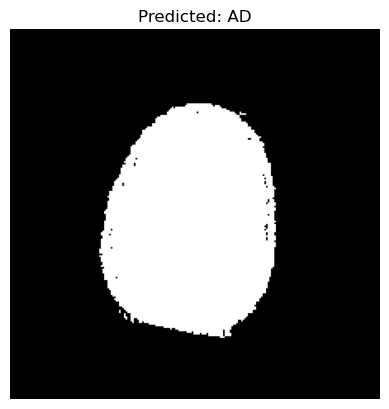

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


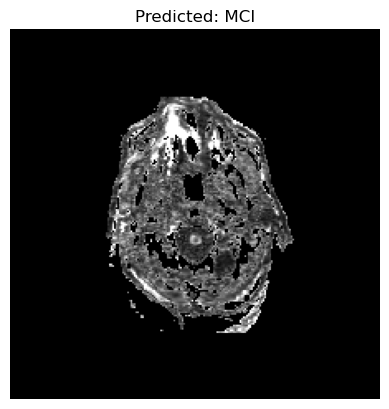

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


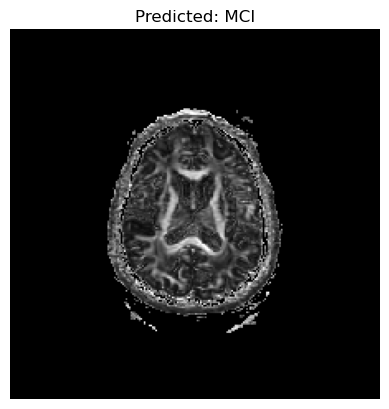

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


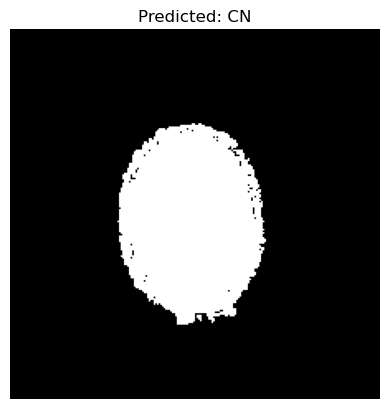

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


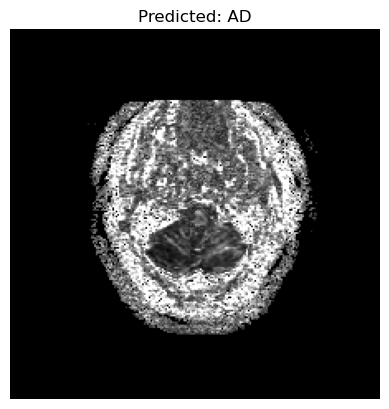

Predictions saved to D:/CIP/model_predictions.csv


In [89]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("D:/CIP/DTI_Model.h5")

# Define class labels (Update based on your dataset)
class_labels =  {0: "AD", 1: "CN", 2: "MCI"}

# Path to test images
test_images_dir = "D:/CIP/split_dti_images/test"

# Get all test images
all_files = []
for root, _, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith((".png", ".jpg", ".jpeg")):
            all_files.append(os.path.join(root, file))

# Randomly select 25 images
random_images = random.sample(all_files, 25)

# Store predictions
predictions_list = []

# Process each image
for img_path in random_images:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Store results
    predictions_list.append({"Image": img_path, "Predicted Class": predicted_label})

    # Display image and prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Convert predictions to DataFrame
df = pd.DataFrame(predictions_list)

# Save predictions to CSV
csv_path = "D:/CIP/model_predictions.csv"
df.to_csv(csv_path, index=False)
print(f"Predictions saved to {csv_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


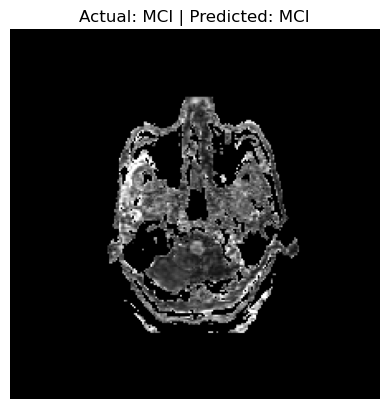

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


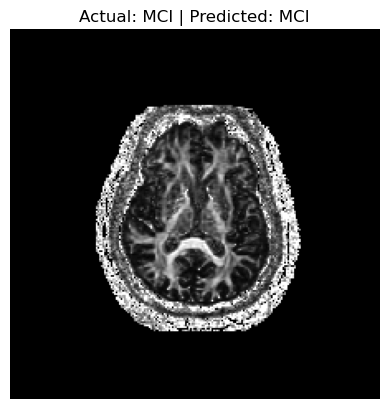

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


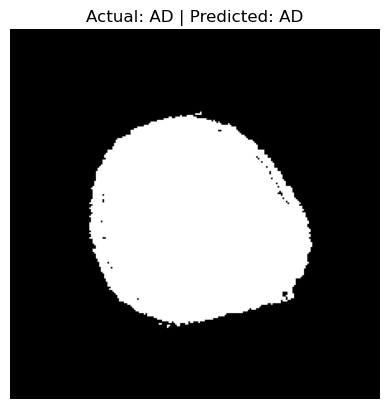

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


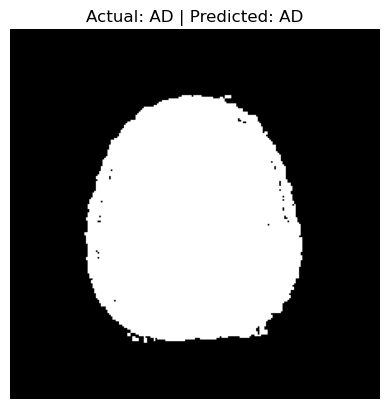

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


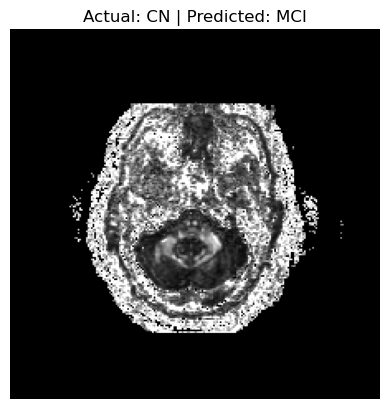

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


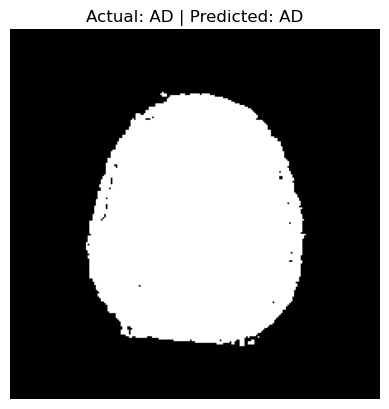

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


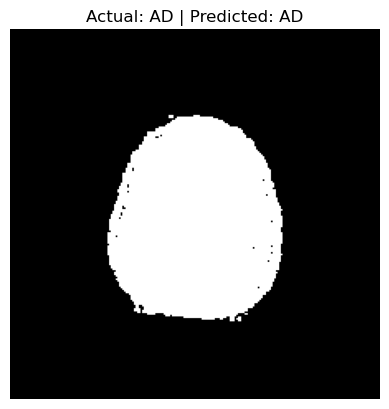

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


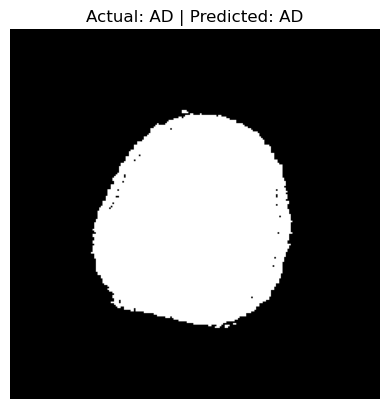

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


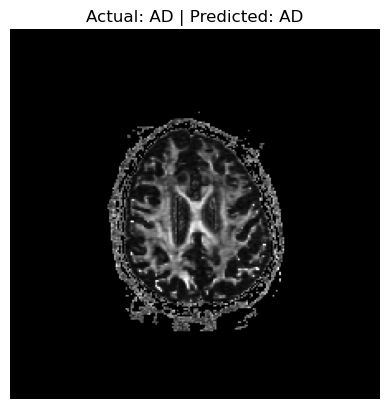

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


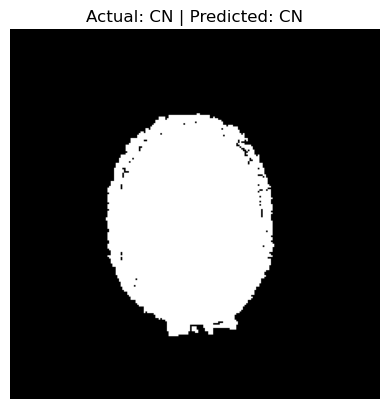

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


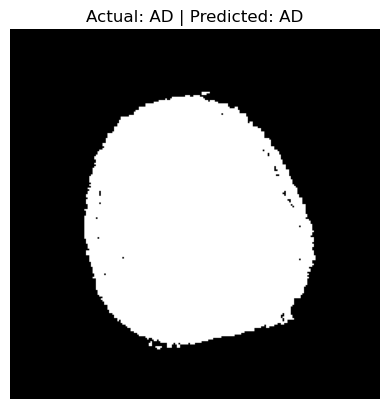

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


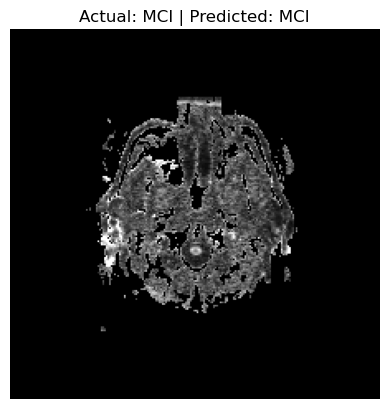

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


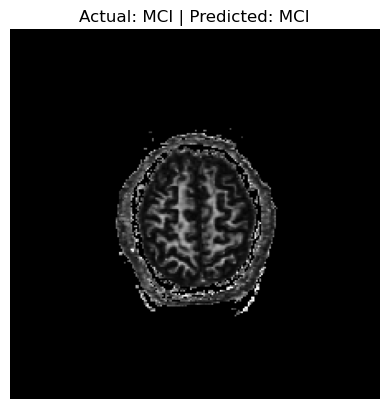

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


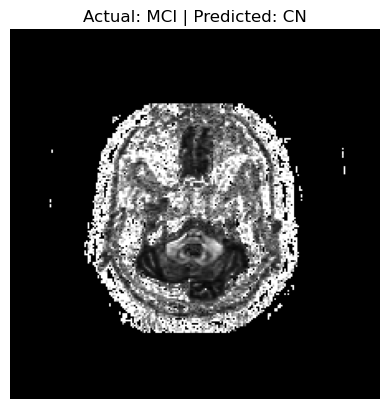

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


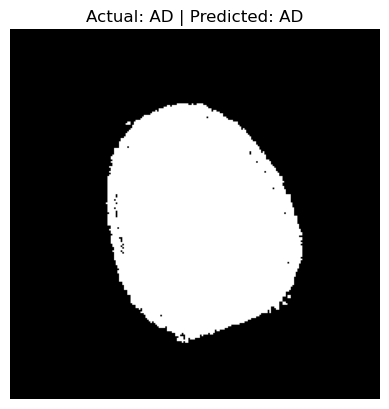

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


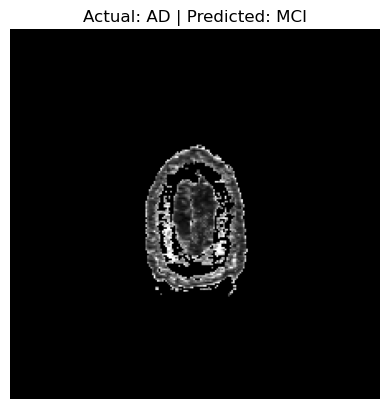

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


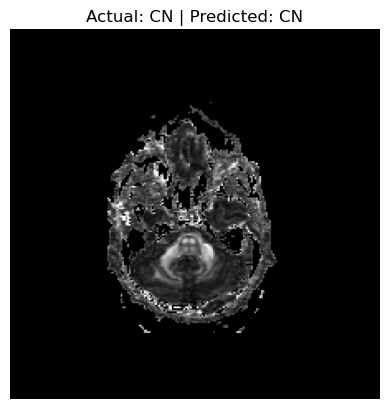

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


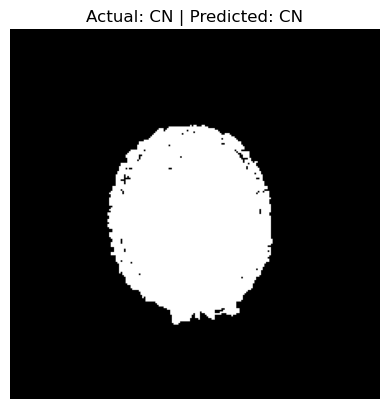

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


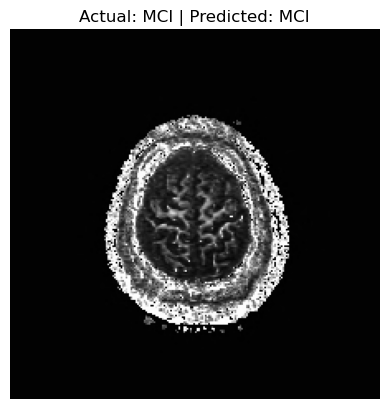

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


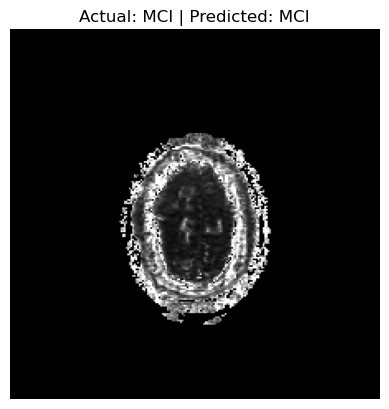

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


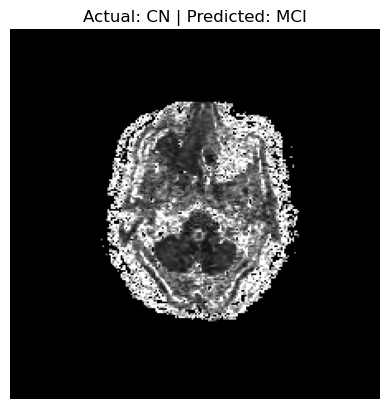

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


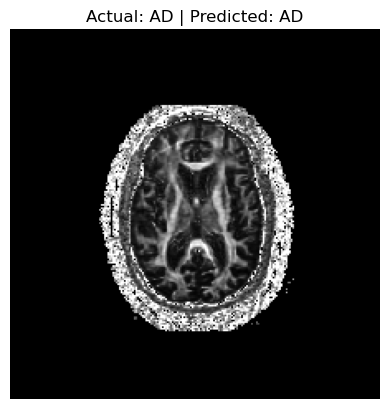

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


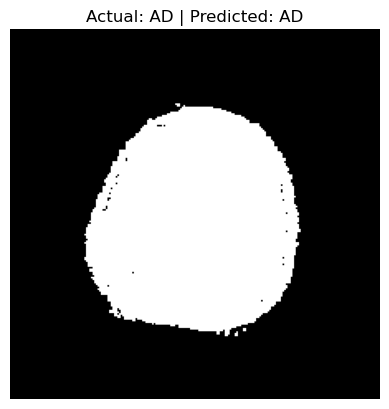

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


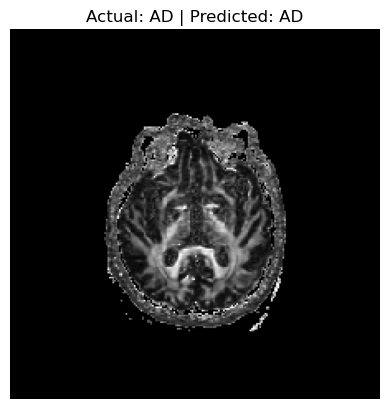

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


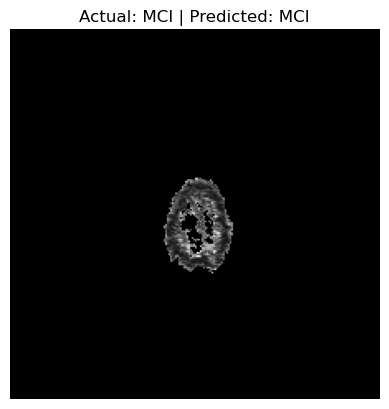

Predictions saved to D:/CIP/test2.csv


In [2]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("D:/CIP/DTI_Model.h5")

# Define class labels (Update based on your dataset)
class_labels = {0: "AD", 1: "CN", 2: "MCI"}

# Path to test images
test_images_dir = "D:/CIP/split_dti_images/val"

# Get all test images along with actual labels (folder names)
all_files = []
for root, _, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith((".png", ".jpg", ".jpeg")):
            actual_class = os.path.basename(root)  # Extract folder name as actual class
            all_files.append((os.path.join(root, file), actual_class))

# Randomly select 25 images
random_images = random.sample(all_files, 25)

# Store predictions
predictions_list = []

# Process each image
for img_path, actual_class in random_images:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Store results
    predictions_list.append({"Image": img_path, "Actual Class": actual_class, "Predicted Class": predicted_label})

    # Display image and prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Actual: {actual_class} | Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Convert predictions to DataFrame
df = pd.DataFrame(predictions_list)

# Save predictions to CSV
csv_path = "D:/CIP/test2.csv"
df.to_csv(csv_path, index=False)
print(f"Predictions saved to {csv_path}")


In [96]:
from sklearn.metrics import confusion_matrix, classification_report

# Load predictions from CSV
df = pd.read_csv("D:/CIP/test2.csv")

# Convert labels to numerical values
actual = df["Actual Class"].map({"AD": 0, "CN": 1, "MCI": 2})
predicted = df["Predicted Class"].map({"AD": 0, "CN": 1, "MCI": 2})

# Compute confusion matrix
cm = confusion_matrix(actual, predicted)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(actual, predicted, target_names=["AD", "CN", "MCI"])
print("Classification Report:\n", report)


Confusion Matrix:
 [[ 5  0  0]
 [ 0  9  0]
 [ 1  0 10]]
Classification Report:
               precision    recall  f1-score   support

          AD       0.83      1.00      0.91         5
          CN       1.00      1.00      1.00         9
         MCI       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.94      0.97      0.95        25
weighted avg       0.97      0.96      0.96        25



In [31]:
from tensorflow.keras.models import load_model

# Update with your actual model path
model_path = "D:/CIP/DTI_Model.h5"  # example path
model = load_model(model_path)


In [39]:
# Test image generator with resizing to (224, 224)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),    # Resize the images to match the model's expected input size
    color_mode="grayscale",    # Ensure the model is trained with grayscale images
    batch_size=32,
    class_mode="categorical",  # Multi-class classification
    shuffle=False  # Do not shuffle for evaluation
)


Found 10443 images belonging to 3 classes.


In [53]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('D:/CIP/DTI_Model.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


327/327 ━━━━━━━━━━━━━━━━━━━━ 264s 801ms/step - accuracy: 0.8658 - loss: 0.4109
Test Loss: 0.2791594862937927
Test Accuracy: 0.9048166275024414


In [63]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator, verbose=1)

# Print accuracy
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

327/327 ━━━━━━━━━━━━━━━━━━━━ 195s 595ms/step - accuracy: 0.8658 - loss: 0.4109

Test Accuracy: 90.48%


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 990ms/step

Classification Report (50 Random Samples):
              precision    recall  f1-score   support

          AD       1.00      1.00      1.00        19
          CN       0.85      0.92      0.88        12
         MCI       0.94      0.89      0.92        19

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50



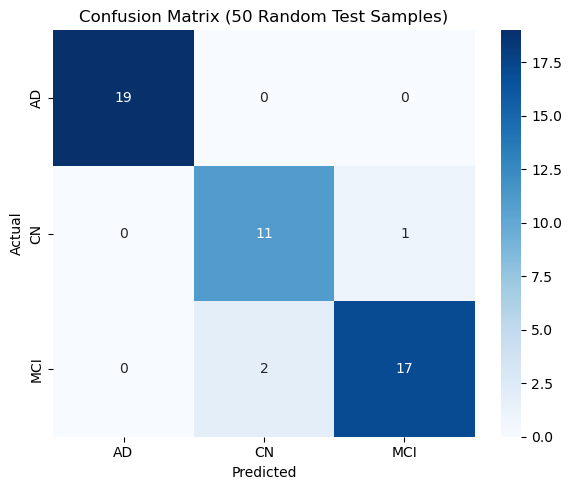

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix, classification_report

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Collect 50 random test samples
x_sample = []
y_true = []

for _ in range(50):
    idx = random.randint(0, len(test_generator) - 1)
    x_batch, y_batch = test_generator[idx]
    x_sample.append(x_batch[0])
    y_true.append(np.argmax(y_batch[0]))

x_sample = np.array(x_sample)
y_true = np.array(y_true)

# Predict
y_pred = np.argmax(model.predict(x_sample), axis=1)

# Classification report
print("\nClassification Report (50 Random Samples):")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (50 Random Test Samples)")
plt.tight_layout()
plt.show()